## * Task 2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data= pd.read_csv("task2_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Calculate the mean of the 'Age' column
age_mean = data["Age"].mean()

# Replace null values in the 'Age' column with the mean
data["Age"].fillna(age_mean, inplace=True)


In [7]:
cabin_mode = data["Cabin"].mode().iloc[0]
data["Cabin"].fillna(cabin_mode, inplace=True)

In [8]:
cabin_mode = data["Embarked"].mode().iloc[0]
data["Embarked"].fillna(cabin_mode, inplace=True)

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

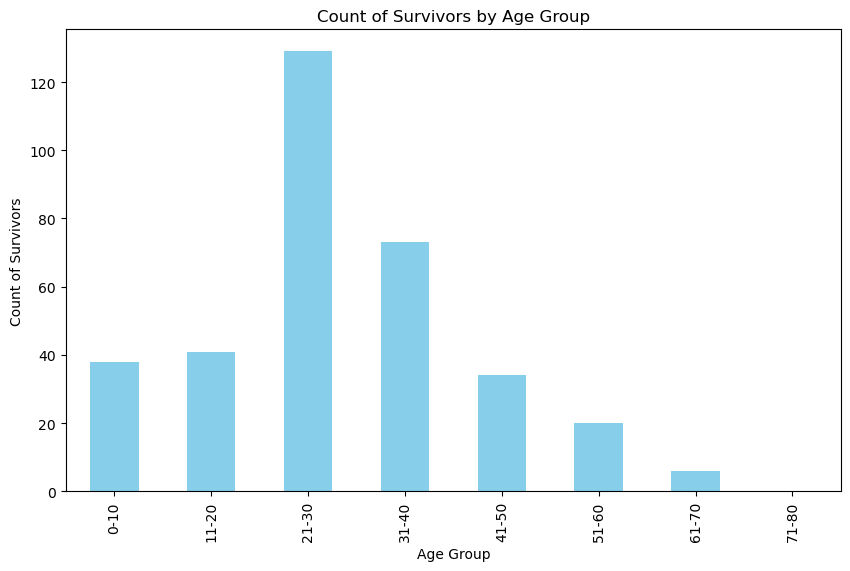

In [10]:
# Define age intervals
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AgeGroup' by categorizing 'Age' into the specified bins
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by 'AgeGroup' and calculate the count of survivors in each age group
age_survived_count = data.groupby('AgeGroup')['Survived'].sum()

# Plotting
plt.figure(figsize=(10, 6))
age_survived_count.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count of Survivors')
plt.title('Count of Survivors by Age Group')

# Show plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

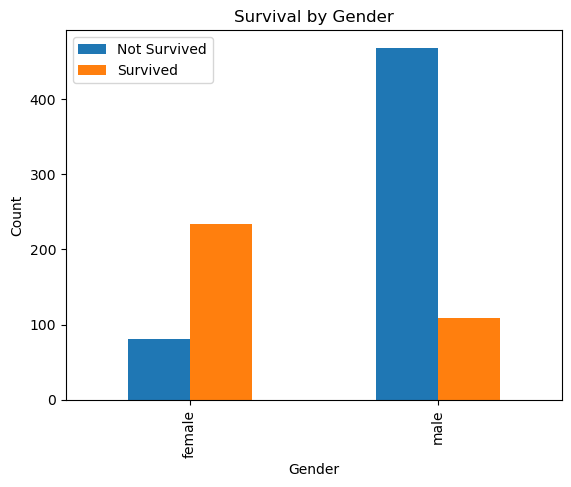

In [11]:
# Grouping by 'gender' and calculating the count of diabetes within each gender
gender_survived_count = data.groupby('Sex')['Survived'].value_counts().unstack()

# Plotting
plt.figure(figsize=(10, 10))
gender_survived_count.plot(kind='bar')
# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.legend(labels=['Not Survived', 'Survived'])

# Show plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

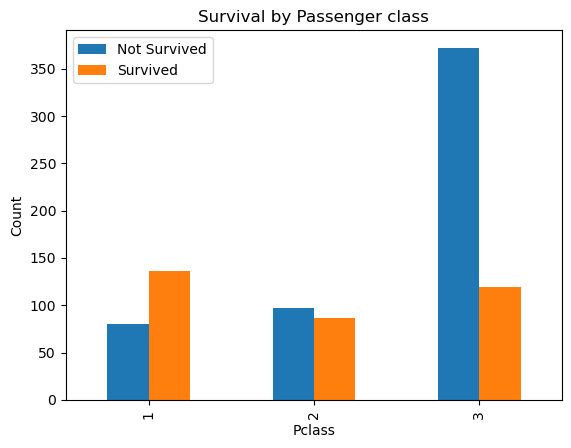

In [12]:
# Grouping by 'gender' and calculating the count of diabetes within each gender
Pclass_survival_count = data.groupby('Pclass')['Survived'].value_counts().unstack()

# Plotting
plt.figure(figsize=(10, 10))
Pclass_survival_count.plot(kind='bar')
# Adding labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival by Passenger class')
plt.legend(labels=['Not Survived', 'Survived'])

# Show plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

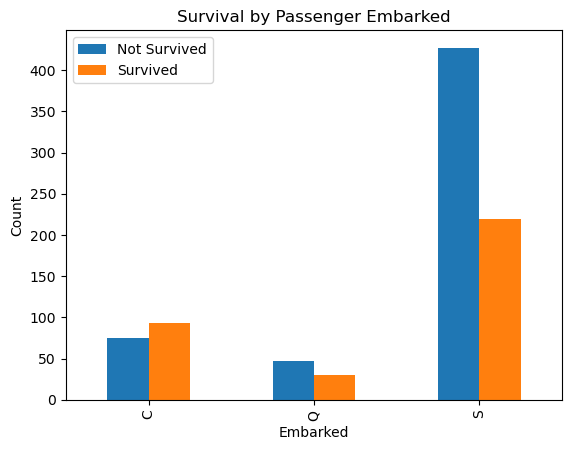

In [13]:
# Grouping by 'gender' and calculating the count of diabetes within each gender
embarked_survival_count = data.groupby('Embarked')['Survived'].value_counts().unstack()

# Plotting
plt.figure(figsize=(10, 10))
embarked_survival_count.plot(kind='bar')
# Adding labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival by Passenger Embarked')
plt.legend(labels=['Not Survived', 'Survived'])

# Show plot
plt.show()

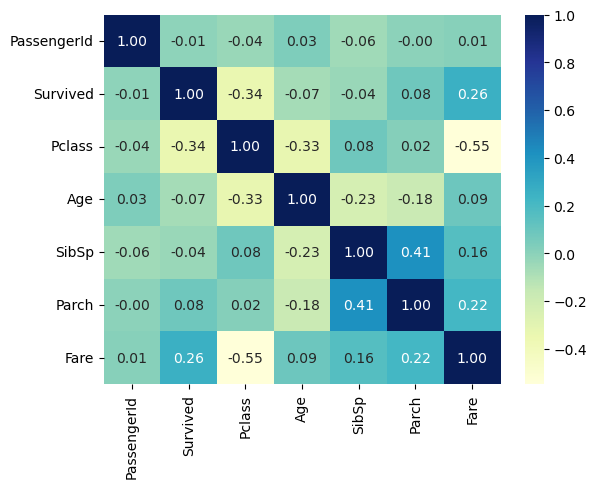

In [14]:
import seaborn as sns

sns.heatmap(data.select_dtypes(include=np.number).corr(),cmap="YlGnBu",annot=True, fmt=".2f")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'gender' column
data['Sex_encoded'] = label_encoder.fit_transform(data['Sex'])
data['Embarked_encoded'] = label_encoder.fit_transform(data['Embarked'])
data['Cabin_encoded'] = label_encoder.fit_transform(data['Cabin'])

In [26]:
# Separate features (X) and target variable (y)
X = data.drop(['Survived', 'Name','Ticket','Sex','Embarked','Cabin','AgeGroup'], axis=1)  # Assuming 'Survived' is the target variable
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

# Initialize the logistic regression model
logreg = LogisticRegression()
# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)


C:\Users\gjpul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       124
           1       0.68      0.73      0.70        55

    accuracy                           0.81       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.81      0.81       179



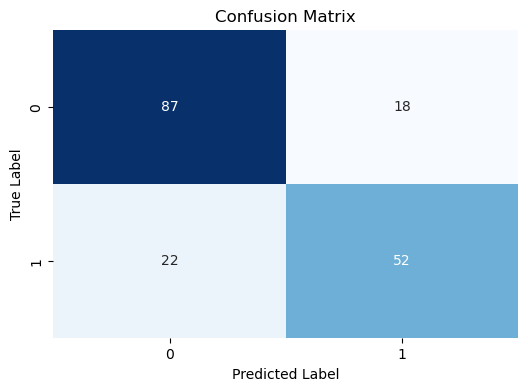

In [19]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Adding labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show plot
plt.show()